In [1]:
import wraplorenzmie.utilities.utilities as utilities
import wraplorenzmie.fits.fit as fit
import imageio
# For Plotting.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#sns.set(style='white', font_scale=2)
%matplotlib inline
import matplotlib as mpl


mpl.rcParams["figure.dpi"] = 130
from matplotlib import rc
rc('font', family='serif')
rc('text', usetex=True)
rc('xtick', labelsize='x-small')
rc('ytick', labelsize='x-small')

def cm2inch(value):
    return value/2.54

No module named 'pylorenzmie.fitting.cython.cminimizers'


In [3]:
vid = utilities.video_reader("G:/Classement_video/stucked_particles/ld_2_tres_concentre/200fps_3um_vert_1p2079e-2NaCl_4/Basler_acA1920-155um__22392621__20210129_114620292.mp4")

In [4]:
def radial_profile(data, center=None):
    if center==None:
        center = np.array(np.shape(data)) / 2
    
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    T = data.ravel()
    V = r.ravel()
    
    err = [np.std(T[V == u]) for u in np.unique(V)]
    
    return radialprofile, err



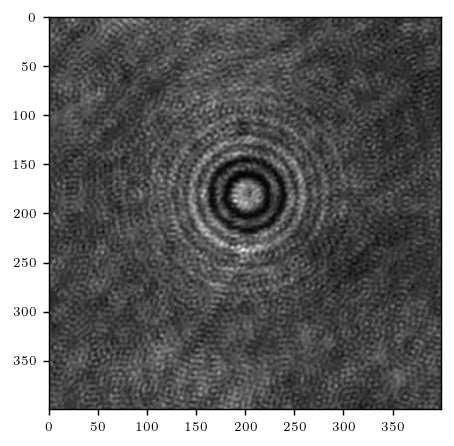

In [5]:
image = vid.get_image(1)
plt.imshow(image,cmap="gray")

100%|████████████████████████████████████████████████████████████████████████| 710000/710000 [07:42<00:00, 1535.75it/s]


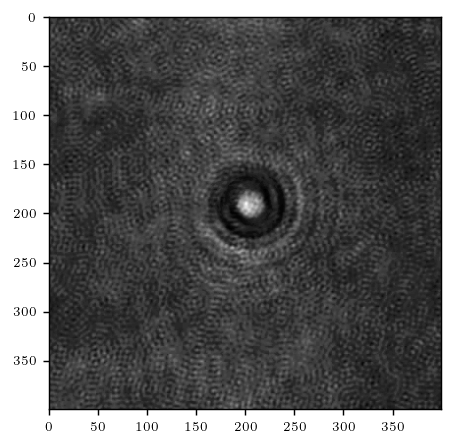

In [8]:
vid.number = 710000
#vid.background = np.array(imageio.imread("background.tiff"))
background = vid.get_background(120)
#vid.background = np.ones_like(image)
plt.imshow(vid.background,cmap="gray")

In [10]:
#imageio.imwrite("background.tiff",vid.background)
imageio.imwrite("ghost.png",vid.background)

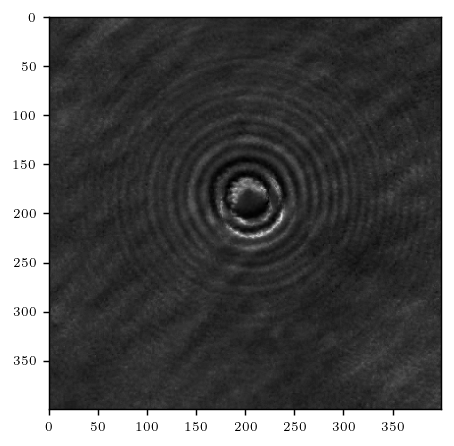

In [11]:
normed_image = utilities.normalize(image,vid.background)
plt.imshow(normed_image,cmap="gray")
normed_image = normed_image

In [8]:
feature, circ = utilities.center_find(image)
feature

array([[198.83189801, 181.9461175 , 400.        , 400.        ]])

In [9]:
feature = np.array([feature[0]])
feature

array([[198.83189801, 181.9461175 , 400.        , 400.        ]])

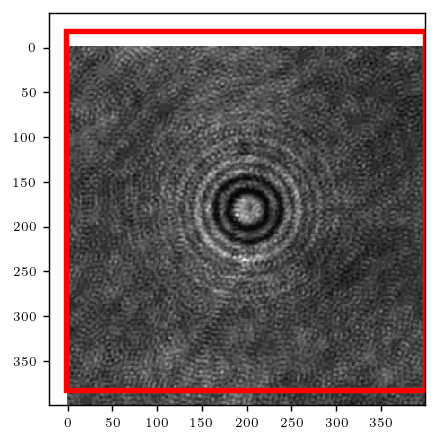

In [10]:
utilities.plot_bounding(normed_image,feature)

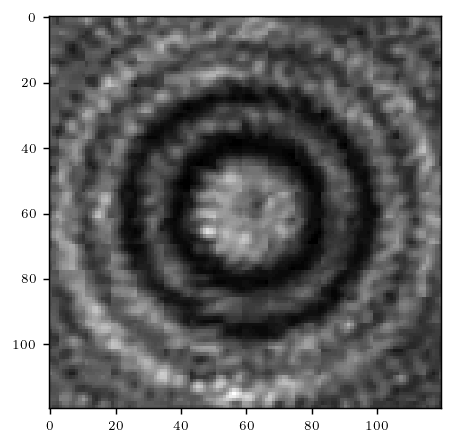

In [11]:
x, y, w, h = feature[0]
x = x + 3
y = y + 1
x_center = x
y_center = y
h=120
im_c = fit.crop(image, int(x), int(y), int(h))
bk_c = fit.crop(vid.background, int(x), int(y), int(h))
cropped = utilities.normalize(im_c,bk_c, dark_count = np.min(im_c))
cropped = cropped / np.mean(cropped)
plt.imshow(cropped,cmap = "gray")

In [12]:
fitter = fit.fitting(cropped,0.532,0.0535, n_m = 1.33)
fitter.make_guess(1.5,1.59,6,alpha = 1,fit_r=True, fit_n=True,fit_alpha=True)

In [13]:
#%timeit result = fitter.fit_single(cropped, method = "lm")
result = fitter.fit_single(cropped, method = "lm")

In [14]:
zo = result.result["x"][2]*0.052
print(result.result["x"][2]*0.052)
print(result.redchi)
print(result.result["x"])

6.065438631719608
20.756830882924174
[ 60.36211516  59.64880677 116.64305061   1.48528215   1.60554999
   1.01657393]


In [15]:
result.result.x

array([ 60.36211516,  59.64880677, 116.64305061,   1.48528215,
         1.60554999,   1.01657393])

In [16]:
result.result

 active_mask: array([0, 0, 0, 0, 0, 0])
        cost: 14882.647743056634
         fun: array([-8.65120769,  7.90094367, -0.38822619, ..., -5.37721761,
       -0.93348751, -0.67596384])
        grad: array([-7.11279835e+00,  5.66605766e+00,  1.52859523e+00,  2.47860248e+03,
        2.16213012e+03, -1.04054937e-01])
         jac: array([[-2.32220523e+00, -1.46028362e+00,  7.35633686e-01,
        -1.10581200e+02, -1.97013488e+02,  1.23037278e+01],
       [-4.83443783e+00,  1.58610980e+00, -1.17944955e+00,
         1.00876631e+02,  2.18060864e+02,  3.75372950e+01],
       [ 1.63399476e-01, -3.72460748e+00, -1.22835459e-01,
        -1.89307461e+02, -4.63003831e+02,  5.54406349e+01],
       ...,
       [-3.96896722e-01,  6.16488284e-01,  4.28746681e-01,
         3.32995321e+00, -3.13184486e+01,  3.09633055e+01],
       [ 1.24997281e+00,  9.71288343e-01,  7.68233464e-01,
        -9.51267946e+01, -1.17780606e+02,  5.68115626e+01],
       [ 4.36333257e-01, -2.10581707e-01, -2.56644404e-01,
    

In [17]:
np.linalg.inv(np.dot(np.transpose(result.result.jac), result.result.jac))

array([[ 1.47102580e-04,  6.00360553e-07,  3.44706394e-05,
        -6.22559523e-07,  4.64835671e-07, -1.50238981e-07],
       [ 6.00360553e-07,  1.46623282e-04,  9.01340036e-06,
         1.04572432e-07, -5.38226372e-08, -3.84727610e-08],
       [ 3.44706394e-05,  9.01340036e-06,  5.99396766e-03,
         4.89319077e-05,  5.56256993e-07,  5.30723049e-06],
       [-6.22559523e-07,  1.04572432e-07,  4.89319077e-05,
         1.21367867e-06, -4.08391278e-07,  1.38637833e-07],
       [ 4.64835671e-07, -5.38226372e-08,  5.56256993e-07,
        -4.08391278e-07,  2.32415248e-07, -4.68429651e-08],
       [-1.50238981e-07, -3.84727610e-08,  5.30723049e-06,
         1.38637833e-07, -4.68429651e-08,  4.79577444e-07]])

In [18]:
np.shape(result.result.fun)

(1440,)

In [19]:
np.shape(fitter.image.flatten())

(14400,)

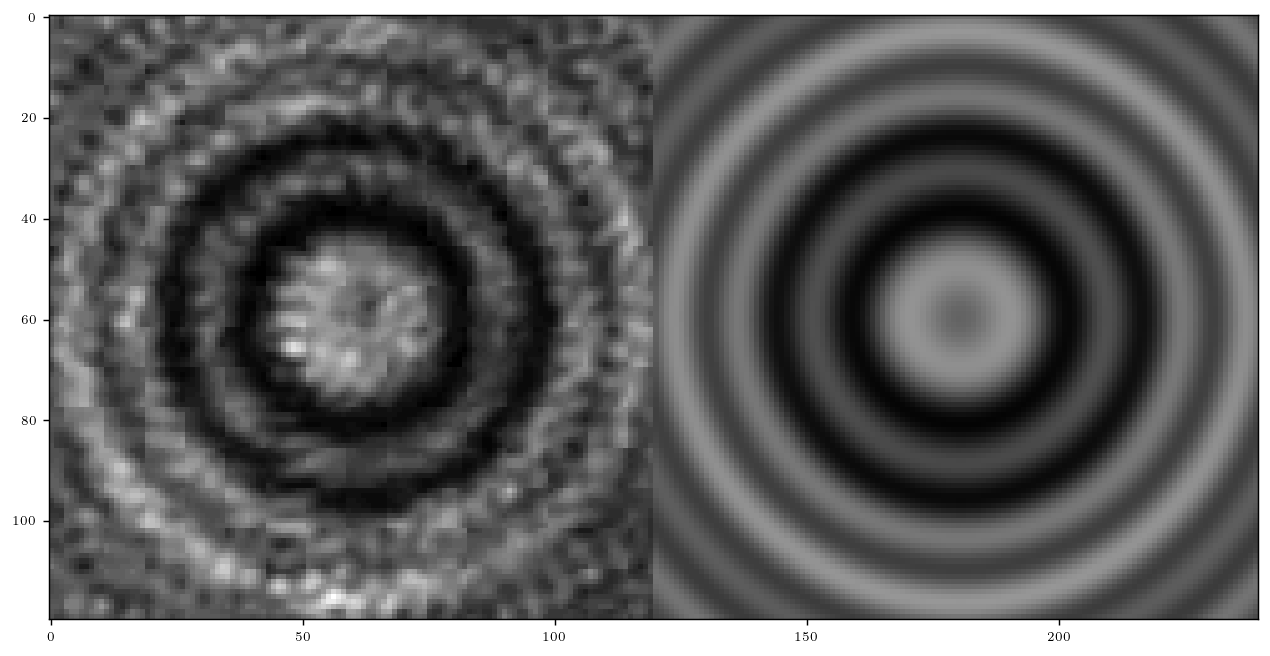

In [20]:
fitter.show_results()

In [21]:
center = np.array(np.shape(fitter.image))

In [22]:
radial_exp, err = radial_profile(fitter.image)


In [23]:
np.shape(radial_exp)

(85,)

Text(0, 0.5, 'Intensity [a.u.]')

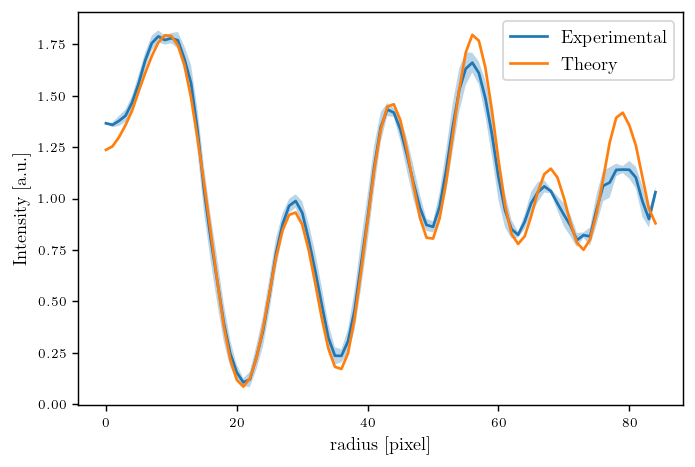

In [24]:

radial_exp, err = radial_profile(fitter.image)
theo_exp, err = radial_profile(fitter.fitter.model.hologram().reshape(fitter.shape))

radius_radial = np.arange(len(radial_exp))
plt.plot(radius_radial, radial_exp, label="Experimental")
plt.fill_between(radius_radial, radial_exp - err, radial_exp + err, alpha = 0.3)
plt.plot(radius_radial, theo_exp, label="Theory")
plt.legend()
plt.xlabel("radius [pixel]")
plt.ylabel("Intensity [a.u.]")
#plt.figure(figsize=(cm2inch(8.6),1.65*cm2inch(8.6)))


In [25]:
sigma = np.sum((fitter.image - fitter.fitter.model.hologram().reshape(fitter.shape)) ** 2)
H_1 = np.linalg.inv(np.dot(np.transpose(result.result.jac), result.result.jac))

error = 1.96 * np.sqrt(sigma * np.diag(H_1)) * [0.0513,0.0513,0.0513,1,1,1]

In [26]:
error

array([0.03640086, 0.03634151, 0.23235856, 0.06445194, 0.02820437,
       0.04051478])

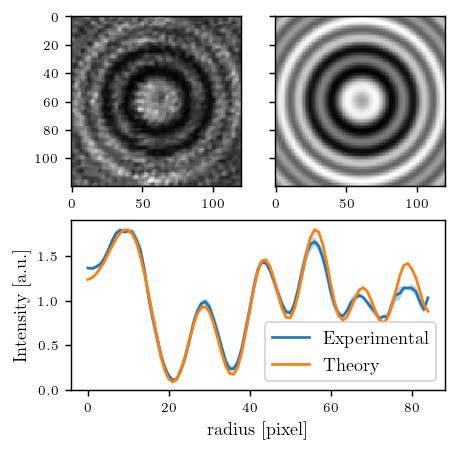

In [27]:
fit_data = {}


fig = plt.figure(figsize=(cm2inch(8.6),1.65*cm2inch(8.6)))
fig.subplots_adjust(left=0.14, bottom=.12, right=.99, top=.98)

plt.subplot(2,2,1)
plt.imshow(fitter.image, cmap = "gray")
#plt.title('subplot(2,2,1)')

fit_data["exp_image"] = fitter.image

plt.subplot(2,2,2)
plt.imshow(fitter.fitter.model.hologram().reshape(fitter.shape), cmap = "gray")
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])

fit_data["th_image"] = fitter.fitter.model.hologram().reshape(fitter.shape)


#plt.title('subplot(2,2,2)')

plt.subplot(2,2,(3,4))
plt.plot(radius_radial, radial_exp, label="Experimental")
plt.fill_between(radius_radial, radial_exp - err, radial_exp + err, alpha = 0.3)
plt.plot(radius_radial, theo_exp, label="Theory")
plt.legend()
plt.xlabel("radius [pixel]")
plt.ylabel("Intensity [a.u.]")

fit_data["I_r_exp"] = radial_exp
fit_data["I_errr_exp"] = err

fit_data["theo_exp"] = theo_exp
fit_data["I_radius"] = radius_radial

fig.set_size_inches(cm2inch(8.6), cm2inch(1.6 * 8.6/1.618))
plt.savefig("fit_fig.pdf")

In [28]:
from scipy.io import savemat
savemat("data_fit_2705.mat", fit_data)

In [29]:
#fitter.fit_video(vid = vid,savefile="find_nr.dat",xc = x ,yc= y, h = 120, n_end=20000,method = "lm", dark_count_mode="min")

In [30]:
n_r = np.fromfile('find_nr.dat', dtype=np.float64)
n_r = n_r.reshape(len(n_r)//10,10)
r = n_r[:,3]
n = n_r[:,4]

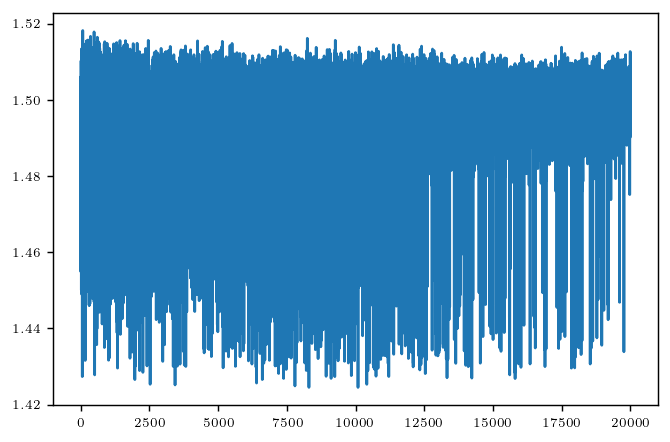

In [31]:
plt.plot(r)

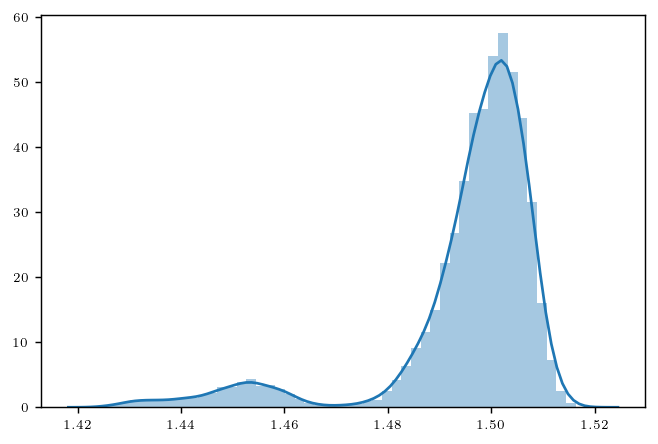

In [32]:
sns.distplot(r)

Text(0.5, 0, 'r [$\\mathrm{\\mu m}$]')

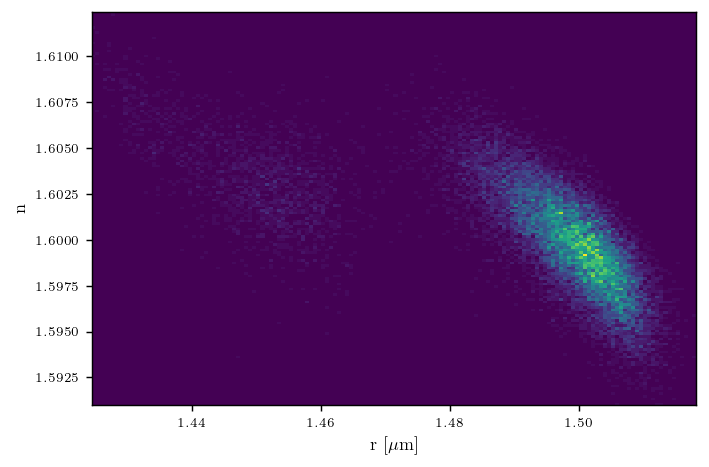

In [33]:
H, xedges, yedges = np.histogram2d(n, r, bins=100)
H = H.T  # Let each row list bins with common y range.


plt.hist2d(r,n, bins = 150)
plt.ylabel("n")
plt.xlabel("r [$\mathrm{\mu m}$]")



In [34]:
data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)


Text(0.5, 1.0, 'KDE r n')

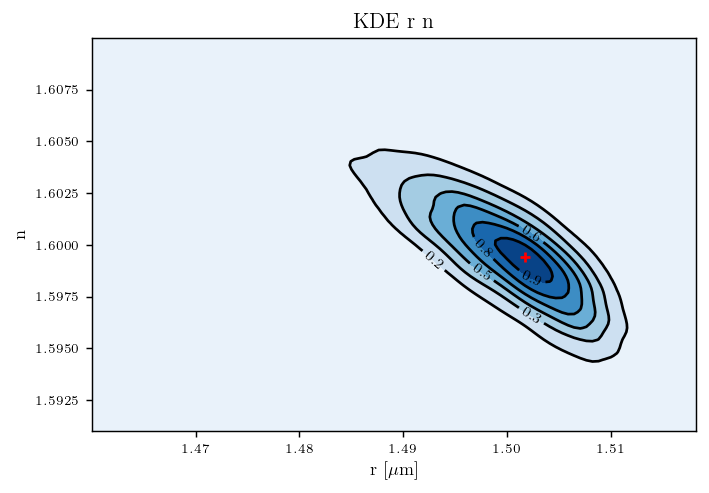

In [35]:


import numpy as np
import matplotlib.pyplot as pl
import scipy.stats as st

data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = r[(r>1.46) & (r<1.56)]
y = n[(r>1.46) & (r<1.56)]
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = np.min(y), np.max(y)

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)
f = f/np.max(f)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k', levels=6)
# Label plot
ax.clabel(cset, inline=1, fontsize=8, fmt="%1.1f")
plt.scatter(xx[np.where(f == 1)],yy[np.where(f == 1)], color = "red", marker="+")
ax.set_xlabel("r [$\mathrm{\mu m}$]")
ax.set_ylabel("n")
plt.title("KDE r n")

#pl.show()



In [36]:


print(" n determined with : mu={0}, sigma={1}".format(np.mean(yy[np.where(f > 0.2)]), np.std(yy[np.where(f > 0.2)])))
print(" r determined with : mu={0}, sigma={1}".format(np.mean(xx[np.where(f > 0.2)]), np.std(xx[np.where(f > 0.2)])))

mu_n, sigma_n = np.mean(yy[np.where(f > 0.2)]), np.std(yy[np.where(f > 0.2)])
mu_r, sigma_r = np.mean(xx[np.where(f > 0.2)]), np.std(xx[np.where(f > 0.2)])


 n determined with : mu=1.599718548897137, sigma=0.002292392794441416
 r determined with : mu=1.4996736884077762, sigma=0.005931877873897593


In [37]:
mu_r

1.4996736884077762

In [38]:
import warnings
warnings.filterwarnings('ignore')
#del fitter
fitter = fit.fitting(cropped,0.532,0.0535, n_m = 1.33)
fitter.make_guess(mu_r,mu_n,zo,alpha = 1,fit_r=False, fit_n=False,fit_alpha=False)
#result = fitter.fit_single(cropped, method = "lm")
fitter.fit_video(vid = vid,savefile="fit_result_37p685nacl_29012021_n_1p499r_1p599fix_0p052_wav_532.dat",xc = x_center ,yc= y_center, h = 120, n_end=vid.number,method = "lm")

100%|██████████| 709999/709999 [3:03:34<00:00, 64.46it/s]  


In [39]:
import numpy as np
import matplotlib.pyplot as plt
data = np.fromfile('fit_result_37p685nacl_29012021_n_1p499r_1p599fix_0p052_wav_532.dat', dtype=np.float64)
data = data.reshape(len(data)//10,10)
#data = data[:115000,:]
x = data[:,0]*0.052
y = data[:,1]*0.052
z = data[:,2]*0.052

In [83]:
import numpy as np
import scipy.io as sio

In [84]:
sio.savemat("fit_result_37p685nacl_29012021_n_1p499r_1p599fix_0p052_wav_532.mat", {'data':data})

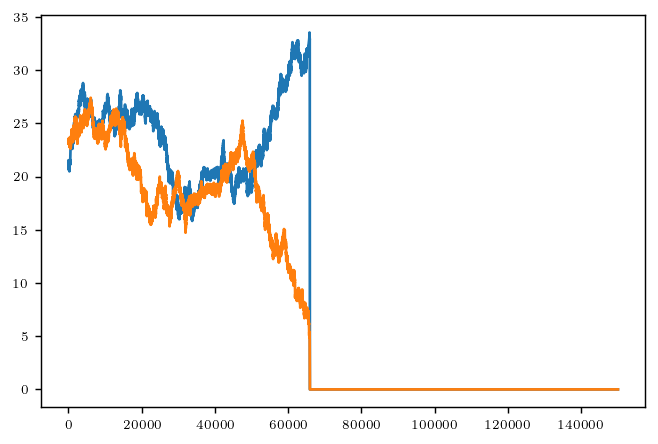

In [85]:
plt.plot(x)
plt.plot(y)

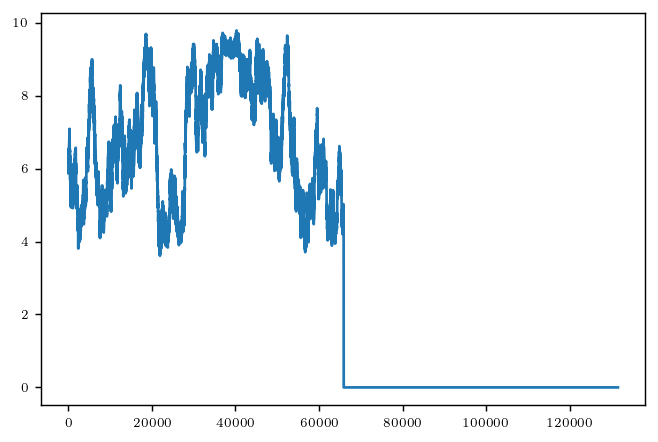

In [86]:
plt.plot(z[:131551])

In [ ]:
shape(data)

In [ ]:
data